In [85]:
# SETUP
## Importing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Random params
np.random.seed(0)
random_state = 338

## Plot params
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

## Load train and test
test = pd.read_csv('../test.csv', index_col='id')
dT = pd.read_csv('../train.csv', index_col='id')

## Calc stats
stats = dT.describe()
statsTarget = stats.pop('claim')
stats = stats.transpose()

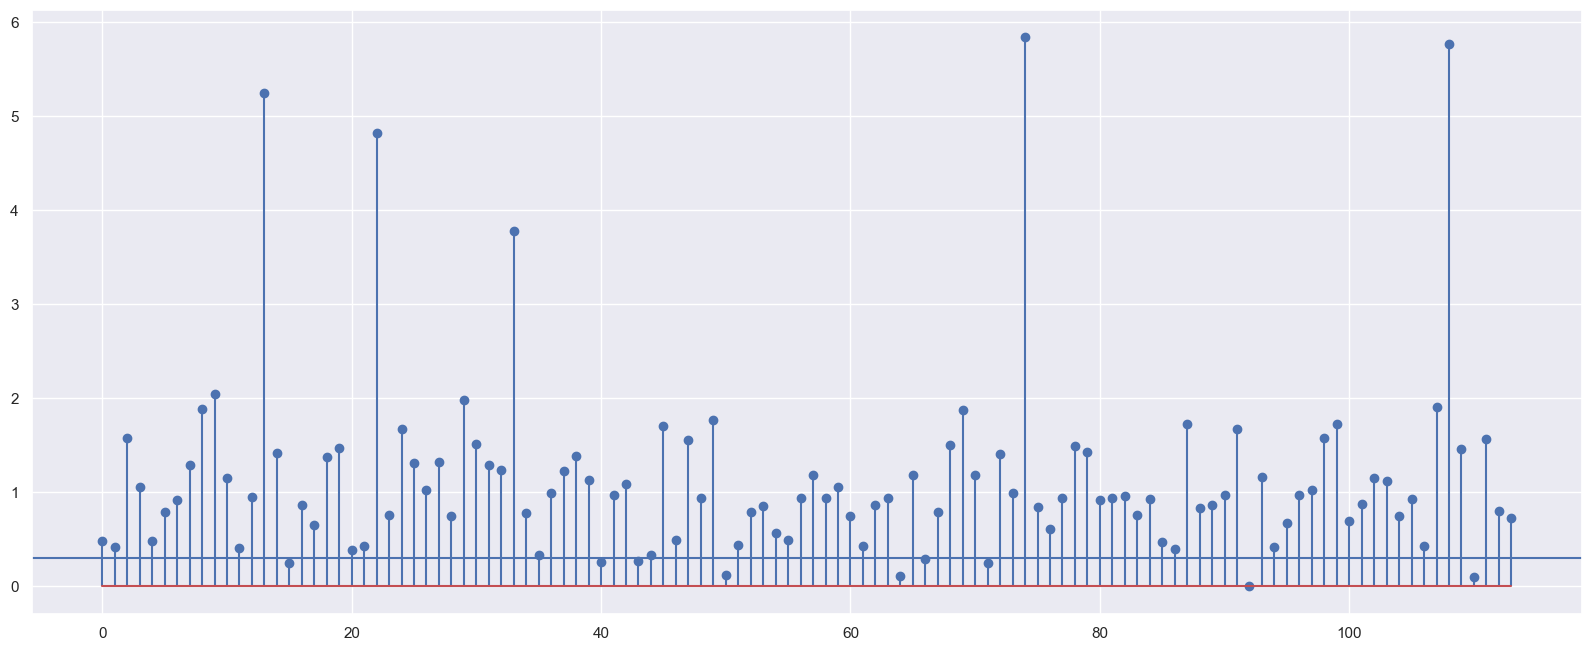

In [86]:
stats['rounded_std_over_mean'] = round(abs(stats['std']/stats['mean']), 2)
plt.stem(stats.loc[stats['rounded_std_over_mean']<= 6]['rounded_std_over_mean'])
plt.axhline(0.3)

In [87]:
stats.head()

,count,mean,std,min,25%,50%,75%,max,rounded_std_over_mean
f1,942672.0,0.090201,0.043564,-0.149910,0.070227,0.090135,0.11650,0.41517,0.48
f2,942729.0,0.345964,0.146251,-0.019044,0.283050,0.389100,0.45845,0.51899,0.42
f3,942428.0,4068.744207,6415.829440,-9421.700000,418.430000,1279.500000,4444.40000,39544.00000,1.58
f4,942359.0,0.201214,0.212510,-0.082122,0.035086,0.137000,0.29710,1.31990,1.06
f5,942514.0,0.304869,0.145343,-0.006990,0.240520,0.327790,0.41283,0.55475,0.48


In [93]:
selection = list(stats.loc[stats['rounded_std_over_mean']>=0.3].index.values)
selection.append('claim')
print(selection)
aug = dT[selection].copy()

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f44', 'f45', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f70', 'f72', 'f73', 'f74', 'f75', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f116', 'f117', 'f118', 'claim']


In [94]:
aug.head()
aug = aug.fillna(value = aug.mode())

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def avaliaModelo(X,y,modelo):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    modelo.fit(X_train,y_train,verbose=False,plot=True)

    print(roc_auc_score(y_test, modelo.predict_proba(X_test)[:,1]))

In [95]:
from catboost import CatBoostClassifier

modelo_FULLDS = CatBoostClassifier(iterations=3000,task_type="GPU",devices='0:1', eval_metric='AUC')

print('\n ~ FULL ~')
X_full = dT.copy()
y_full = X_full.pop('claim')
avaliaModelo(X_full,y_full,modelo_FULLDS)


 ~ FULL ~


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.8004246343436816


In [96]:
modelo_SEL_AUG = CatBoostClassifier(iterations=1000,task_type="GPU",devices='0:1', eval_metric='AUC')

print('\n ~ SELECTED AUGMENTED ~')
X_sel_aug = aug.copy()
y_sel_aug = X_sel_aug.pop('claim')
avaliaModelo(X_sel_aug,y_sel_aug,modelo_SEL_AUG)


 ~ SELECTED AUGMENTED ~


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.7958837449181271
